This notebook is an implementation of classification of sms

In [1]:

#install requeirement
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
#import libraries
import pandas as pd #library for data manipulation and analysis
import numpy as np #library fot operations in arrays and matrices and contain a large collection of high level matematcial functions  
import matplotlib.pyplot as plt #library for data visualisation
import seaborn as sns #Python data visualization library based on matplotlib



In [30]:
#import data
#path = 'C:/Users/hp/Desktop/kaggle_sms_spam/spam.csv'
path = '/content/spam.csv'
df = pd.read_csv(path, encoding='latin1')
df.head(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN


In [31]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [32]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3','Unnamed: 4'],inplace=True)
df.head(6)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [33]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [34]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**Data visualisation**

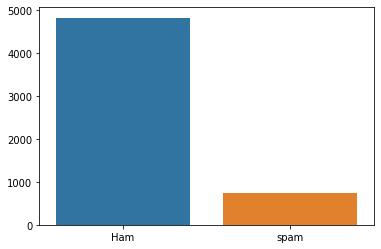

In [35]:
#visualise the spam and ham sms
x = ['Ham','spam']
y = [(df['v1'] == 'ham').sum(),(df['v1'] != 'ham').sum()]
sns.barplot(data=df, x=x, y=y)

In [36]:
#check dupplication
df.duplicated().sum()

403

In [37]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.describe()

,v1,v2
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


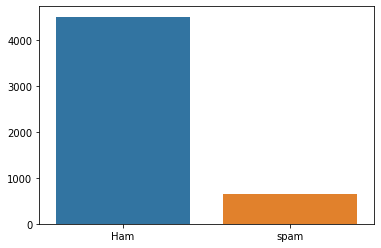

In [38]:
x = ['Ham','spam']
y = [(df['v1'] == 'ham').sum(),(df['v1'] != 'ham').sum()]
sns.barplot(data=df, x=x, y=y)

In [39]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
# load nltk's English stopwords as variable called 'stopp' and don't find synonym of those words.
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopp = nltk.corpus.stopwords.words('english') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
print(stopp)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
#rename columns
df.rename(columns={'v1':'label' , 'v2':'sms'} , inplace=True)

In [43]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
#change cat to numeric value 0/1
"""
#we use Label Encoder for Encoding the target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
"""
df['label'] = df['label'].map({'ham':0, 'spam':1})

In [45]:
df.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
df['sms'] = df['sms'].str.lower()
df.head()

,label,sms
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [47]:
import string
from nltk import ngrams, everygrams, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer # Replacement to word_tokenize, that does not split contractions like - don't, isn't etc

def cleanse_message(message, lower_case=True, stem=True, stop_words=True):
    # Remove Periods
    #message = message.replace('.',' ')
    table = str.maketrans('', '', string.punctuation)
    message = message.translate(table)
    
    # Convert to lower-case
    if lower_case:
        message = message.lower()
    
    # Tokenize a string to split off punctuation other than periods (The NLTK lib way)
    #words = word_tokenize(message)
    tt = TweetTokenizer()
    words = tt.tokenize(message)
    
    # Filter by minimum word length
#     if(min_word_length>1):
#         words = [w for w in words if len(w)>=min_word_length]
    
    # Discard  STOP words
    if(stop_words):
        sw = set(stopwords.words('english'))
        words = [word for word in words if word not in sw]
    
    # Do Stemming
    if(stem):
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    
    # N-grams for better semantics
#     if(gram>1):
#         words = everygrams(words, 1,gram) # t to "gram" N-grams
#         words = list(words)
#         words = np.asarray(words)
    message = ' '.join(w for w in words)
    return message

In [49]:
df['xtrain'] = list( map(lambda msg : cleanse_message(msg), df['sms']) )

In [51]:
df.head()

,label,sms,xtrain
0,0,"go until jurong point, crazy.. available only ...",go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
ytrain = df['label']
tfidvec =  TfidfVectorizer()
tfidvec.fit(df['xtrain'],ytrain)
res = tfidvec.transform(df['xtrain'])

In [60]:
print(type(res))

<class 'scipy.sparse.csr.csr_matrix'>


In [61]:
df.head()

,label,sms,xtrain
0,0,"go until jurong point, crazy.. available only ...",go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [ ]:
"""
# Replace email addresses with 'email'
# you can use any regex expression they are basically taken from the wikipedia

processed = text_message.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
# you can use any regex expression they are basically taken from the wikipedia

processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
# you can use any regex expression they are basically taken from the wikipedia

processed = processed.str.replace(r'£|\$', 'moneysymb')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
# you can use any regex expression they are basically taken from the wikipedia

processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr')

# Replace numbers with 'numbr'
# you can use any regex expression they are basically taken from the wikipedia

processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuation
# you can use any regex expression they are basically taken from the wikipedia

processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

processed = processed.apply(lambda x: ' '.join(term for term in x.split() if term not in stopp))

# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer() # it removes the synonyms and similar sounding words..
processed = processed.apply(lambda x: ' '.join( ps.stem(term) for term in x.split()))

"""

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(res,ytrain,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
mnb = MultinomialNB()
# MultinomialNB
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9574468085106383
[[896   0]
 [ 44  94]]
1.0


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [67]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [68]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [69]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, 0.9743589743589743)

In [70]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.9574468085106383
Precision -  1.0
For  DT
Accuracy -  0.9400386847195358
Precision -  0.8584905660377359
For  LR
Accuracy -  0.9506769825918762
Precision -  0.9393939393939394
For  RF
Accuracy -  0.9700193423597679
Precision -  1.0
For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9557522123893806
For  BgC
Accuracy -  0.965183752417795
Precision -  0.8984375
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9564796905222437
Precision -  0.9345794392523364
For  xgb
Accuracy -  0.9516441005802708
Precision -  0.94


In [71]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [72]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
2,NB,0.957447,1.000000
5,RF,0.970019,1.000000
8,ETC,0.974855,0.974576
0,SVC,0.973888,0.974359
6,AdaBoost,0.966151,0.955752
10,xgb,0.951644,0.940000
4,LR,0.950677,0.939394
9,GBDT,0.956480,0.934579
7,BgC,0.965184,0.898438
